## Imports


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


## Ground truth function

$f : [0,1] \rightarrow \mathbb{R}$


In [2]:

gtf = lambda x: torch.sin(x) + torch.sin(15*x)


# more functions to try
# surge, step, perlin noise, uniform random


## Display

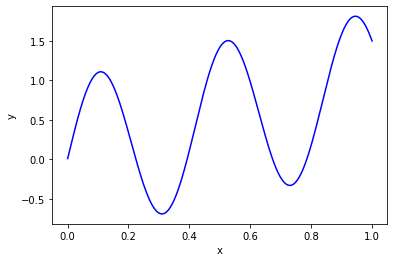

In [3]:

dispN = 1000  # Number of display samples
dispT = 1/dispN  # Display sampling period

disp_xs = (torch.arange(dispN) + 0.5) * dispT
disp_ys = gtf(disp_xs)

fig, ax = plt.subplots(1, 1)
# fig.set_size_inches(20,10)
ax.plot(disp_xs, disp_ys, c='#00f')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()


## Sampling


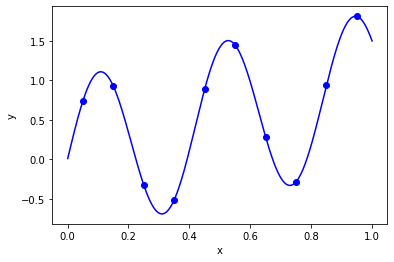

In [4]:

N = 10  # Sample count = frequency (since domain is 0 to 1)
T = 1/N  # Sampling period

xs = (torch.arange(N) + 0.5) * T
ys = gtf(xs)

fig, ax = plt.subplots(1, 1)
# fig.set_size_inches(20,10)
ax.scatter(xs, ys, c='#00f')
ax.plot(disp_xs, disp_ys, c='#00f')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()


## Vanilla MLP


In [11]:



def make_net(width, depth):
  layers = []
  for i in range(depth):
    inputs = 1 if (i == 0) else width
    outputs = 1 if (i == depth-1) else width
    layers.append(nn.Linear(inputs, outputs))
    if i != depth - 1:
      layers.append(nn.Sigmoid())
  return nn.Sequential(*layers)


net = make_net(100, 2+3)



nxs = xs.unsqueeze(1)
exp_ys = ys.unsqueeze(1)
act_ys = net(nxs)


100%|██████████| 10000/10000 [00:07<00:00, 1362.24it/s]


0.022927243262529373


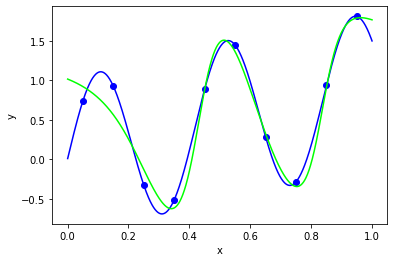

In [19]:

optimizer = optim.SGD(net.parameters(), lr=0.1)
criterion = nn.MSELoss()

# training loop
epoch_count = 10000

for epoch in tqdm(range(epoch_count)):
  optimizer.zero_grad()
  loss = criterion(net(xs.unsqueeze(1)), ys.unsqueeze(1))
  loss.backward()
  optimizer.step()


with torch.no_grad():
  loss = criterion(net(xs.unsqueeze(1)), ys.unsqueeze(1))
  print(loss.item())

with torch.no_grad():
  disp_net_ys = net(disp_xs.unsqueeze(1)).squeeze()

fig, ax = plt.subplots(1, 1)
# fig.set_size_inches(20,10)
ax.scatter(xs, ys, c='#00f')
ax.plot(disp_xs, disp_ys, c='#00f')
ax.plot(disp_xs, disp_net_ys, c='#0f0')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

